<a href="https://colab.research.google.com/github/suraj3p/internship-ai-ml/blob/main/Task11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dimensionality reduction using PCA**

**Principal Component Analysis (PCA)**: a dimensionality reduction technique, transform high-dimensional data into a lower-dimensional space.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/segmentation data.csv')

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None


In [ ]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000

In [ ]:
# Display the first few rows of the dataset
print("\nFirst 5 rows:")
df.head()



First 5 rows:


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


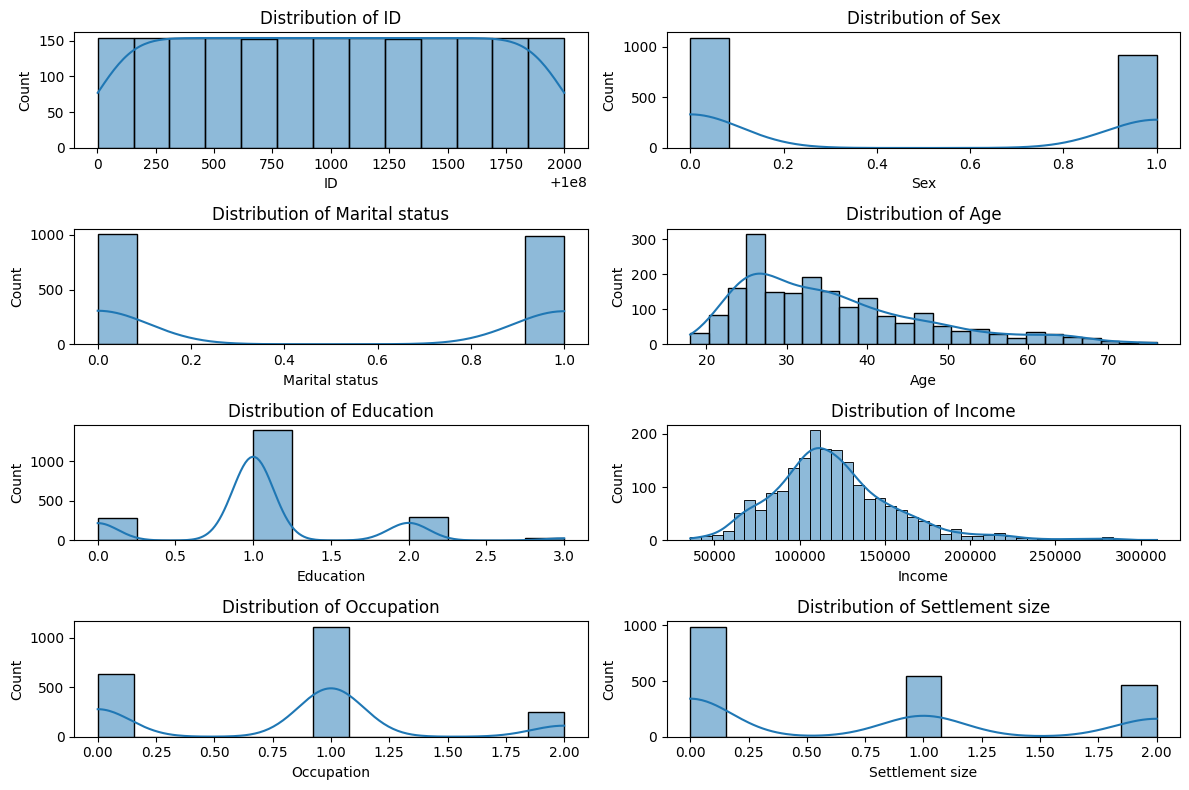

In [ ]:
# Visualize the distribution of numerical features
num_features = df.select_dtypes(include=['float64', 'int64']).columns
num_features_count = len(num_features)

# Calculate the number of rows and columns for subplots
num_rows = (num_features_count // 2) + (num_features_count % 2)
num_cols = 2

plt.figure(figsize=(12, 8))

for i, feature in enumerate(num_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


In [ ]:
# Standardize the numerical features for PCA
scaler = StandardScaler()
num_features_scaled = scaler.fit_transform(df[num_features])


In [ ]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(num_features_scaled)

In [ ]:
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

In [ ]:
# Display variance explained by each principal component
print("\nVariance Explained by each Principal Component:")
print(pca.explained_variance_ratio_)



Variance Explained by each Principal Component:
[0.34103573 0.23178599]


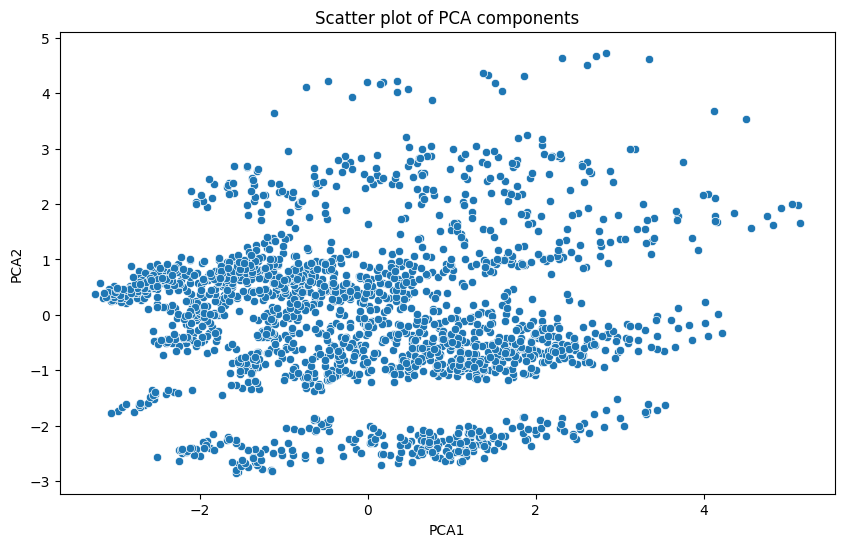

In [ ]:
# Scatter plot of the two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title("Scatter plot of PCA components")
plt.show()

In [ ]:
# Apply KMeans clustering on the PCA features
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_result)

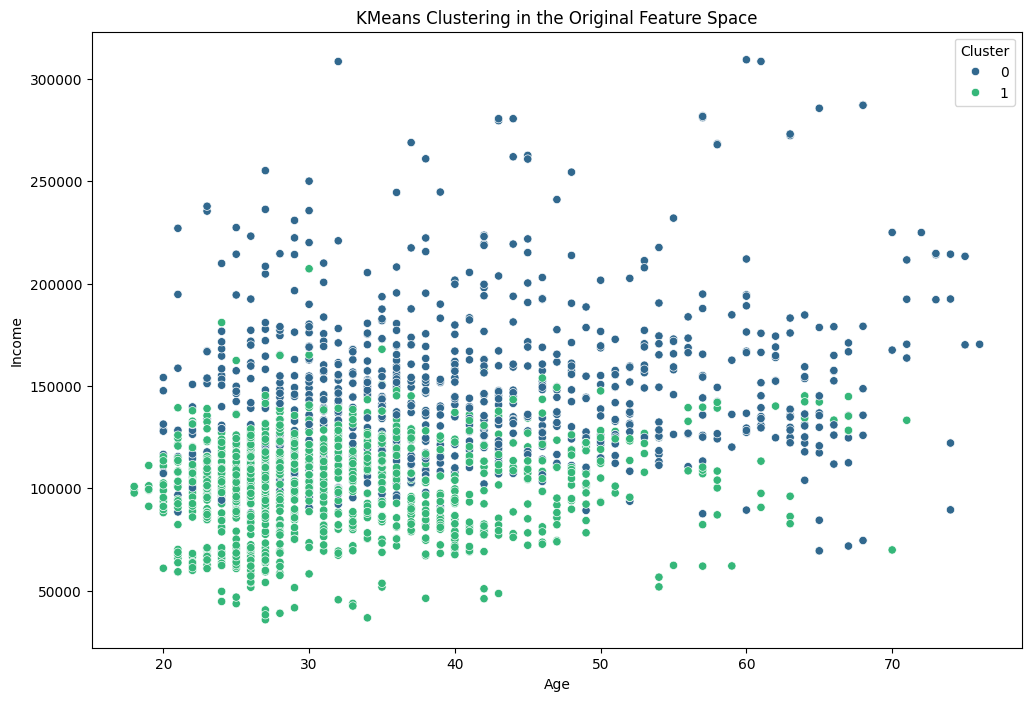

In [ ]:
# Visualize the clusters in the original feature space
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Income', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title("KMeans Clustering in the Original Feature Space")
plt.show()